In [1]:
import matplotlib.pyplot as plt
import os

# Define data for each dataset
datasets = {
    "Clean model": {
        "Train Loss":       [0.032, 0.022, 0.021, 0.020, 0.020, 0.019, 0.019, 0.019, 0.019, 0.018],
        "Validation Loss":  [0.022, 0.021, 0.021, 0.020, 0.020, 0.019, 0.019, 0.019, 0.019, 0.018],
        "Train SNR":        [3.934, 4.527, 4.613, 4.740, 4.765, 4.826, 4.884, 4.944, 5.010, 5.065],
        "Validation SNR":   [5.732, 3.422, 6.843, 5.478, 7.608, 2.583, 2.957, 5.892, 7.023, 9.112],
        "Train LSD":        [5.842, 5.523, 5.449, 5.397, 5.375, 5.346, 5.333, 5.319, 5.299, 5.285],
        "Validation LSD":   [5.450, 5.997, 5.238, 5.479, 5.266, 5.864, 5.695, 5.355, 5.151, 5.089]
    },
    "pr0.1, ps0.1": {
        "Train Loss":       [0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Validation Loss":  [0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.019, 0.018],
        "Train SNR":        [5.164, 5.179, 5.146, 5.270, 5.244, 5.304, 5.298, 5.338, 5.370, 5.357],
        "Validation SNR":   [1.997, 8.413, 5.386, 5.872, 3.655, 2.884, 4.400, 4.424, 3.140, 3.411],
        "Train LSD":        [5.270, 5.265, 5.261, 5.241, 5.246, 5.234, 5.233, 5.224, 5.214, 5.213],
        "Validation LSD":   [5.657, 4.746, 4.896, 5.033, 5.193, 5.342, 5.166, 5.319, 5.439, 5.395]
    },
    "pr0.1, ps0.02": {
        "Train Loss":       [0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Validation Loss":  [0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.017, 0.018, 0.018],
        "Train SNR":        [5.136, 5.212, 5.244, 5.268, 5.267, 5.317, 5.323, 5.327, 5.339, 5.415],
        "Validation SNR":   [5.926, 3.650, 7.167, 3.345, 4.062, 8.323, 2.558, 3.349, 5.567, 5.431],
        "Train LSD":        [5.284, 5.265, 5.254, 5.248, 5.240, 5.230, 5.228, 5.224, 5.218, 5.212],
        "Validation LSD":   [5.181, 5.445, 5.297, 5.417, 5.127, 4.680, 5.280, 5.532, 5.148, 4.989]
    },
    "pr0.3, ps0.1": {
        "Train Loss":       [0.019, 0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Validation Loss":  [0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Train SNR":        [5.214, 5.372, 5.317, 5.407, 5.425, 5.455, 5.444, 5.509, 5.549, 5.476],
        "Validation SNR":   [3.784, 6.876, 6.420, 6.233, 6.602, 5.756, 4.218, 6.037, 4.105, 8.488],
        "Train LSD":        [5.280, 5.250, 5.254, 5.243, 5.238, 5.229, 5.230, 5.214, 5.207, 5.216],
        "Validation LSD":   [5.580, 5.073, 5.006, 5.456, 5.299, 5.118, 5.367, 5.228, 5.473, 4.900]
    },
    "pr0.5, ps0.1": {
        "Train Loss":       [0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Validation Loss":  [0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Train SNR":        [5.359, 5.509, 5.446, 5.556, 5.548, 5.543, 5.642, 5.624, 5.699, 5.665],
        "Validation SNR":   [1.837, 4.277, 6.491, 7.992, 8.216, 1.209, 3.922, 9.695, 2.141, 9.656],
        "Train LSD":        [5.269, 5.248, 5.252, 5.237, 5.232, 5.231, 5.214, 5.212, 5.200, 5.204],
        "Validation LSD":   [5.440, 5.087, 5.065, 4.845, 4.862, 5.766, 5.347, 4.581, 5.793, 4.822]
    },
    "pr0.5, ps0.02": {
        "Train Loss":       [0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Validation Loss":  [0.018, 0.018, 0.018, 0.018, 0.018, 0.017, 0.018, 0.017, 0.017, 0.017],
        "Train SNR":        [5.215, 5.340, 5.364, 5.357, 5.378, 5.458, 5.417, 5.462, 5.508, 5.517],
        "Validation SNR":   [5.981, 8.901, 10.587, 10.926, 8.776, 8.840, 11.962, 9.967, 11.178, 7.990],
        "Train LSD":        [5.278, 5.263, 5.252, 5.245, 5.242, 5.230, 5.230, 5.220, 5.216, 5.210],
        "Validation LSD":   [5.455, 5.175, 5.029, 4.978, 5.343, 5.403, 4.827, 5.144, 4.973, 5.472]
    },
    "pr0.7, ps0.1": {
        "Train Loss":       [0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Validation Loss":  [0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018],
        "Train SNR":        [5.501, 5.545, 5.630, 5.610, 5.657, 5.689, 5.709, 5.730, 5.770, 5.766],
        "Validation SNR":   [1.243, 7.769, 2.170, 5.223, 10.387, 4.574, 3.225, 6.145, 6.224, 4.985],
        "Train LSD":        [5.265, 5.255, 5.241, 5.241, 5.227, 5.220, 5.218, 5.213, 5.202, 5.204],
        "Validation LSD":   [5.889, 4.910, 5.234, 5.170, 4.561, 5.526, 5.874, 5.018, 5.047, 5.023]
    }
}

# Plotting MSE Loss across epochs for each model in the updated dataset
epochs = list(range(1, 11))  # 10 epochs

os.makedirs("plots", exist_ok=True)

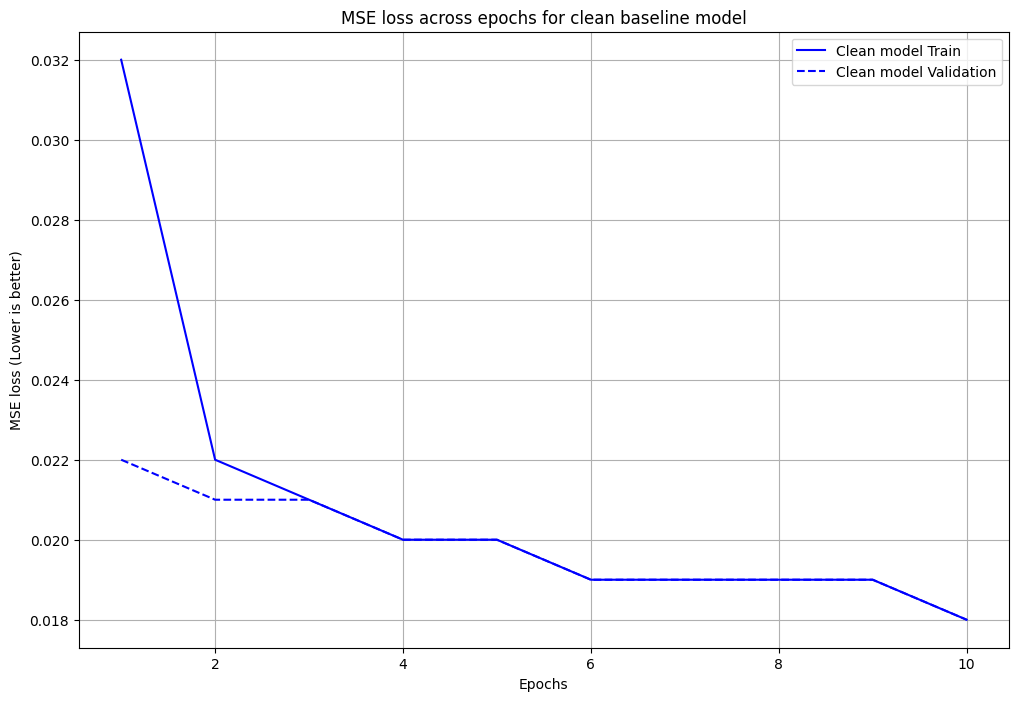

In [2]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
color = "blue"

# Plot each model's training and validation loss with a different color
clean_model_data = datasets["Clean model"]
plt.plot(epochs, clean_model_data["Train Loss"], label="Clean model Train", color=color)
plt.plot(epochs, clean_model_data["Validation Loss"], linestyle="--", label="Clean model Validation", color=color)
# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("MSE loss (Lower is better)")
plt.title("MSE loss across epochs for clean baseline model")
plt.legend()
plt.grid(True)

plt.savefig("plots/MSELBaselineModel.png", format="png")

# Show plot
plt.show()

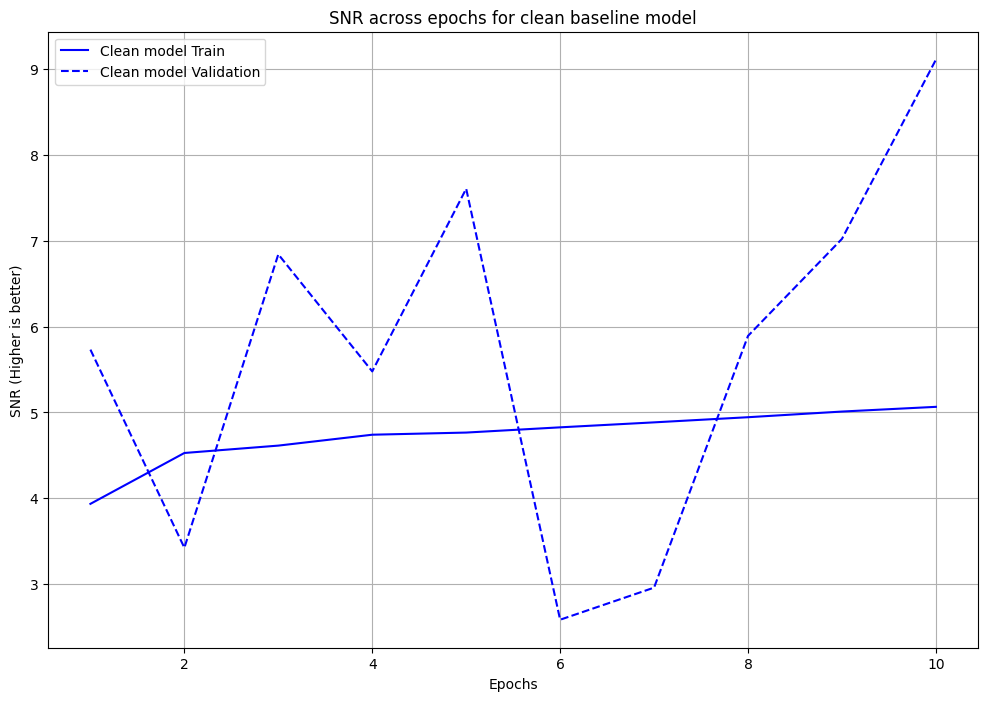

In [3]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
color = "blue"

# Plot each model's training and validation loss with a different color
clean_model_data = datasets["Clean model"]
plt.plot(epochs, clean_model_data["Train SNR"], label="Clean model Train", color=color)
plt.plot(epochs, clean_model_data["Validation SNR"], linestyle="--", label="Clean model Validation", color=color)
# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("SNR (Higher is better)")
plt.title("SNR across epochs for clean baseline model")
plt.legend()
plt.grid(True)

plt.savefig("plots/SNRBaselineModel.png", format="png")

# Show plot
plt.show()

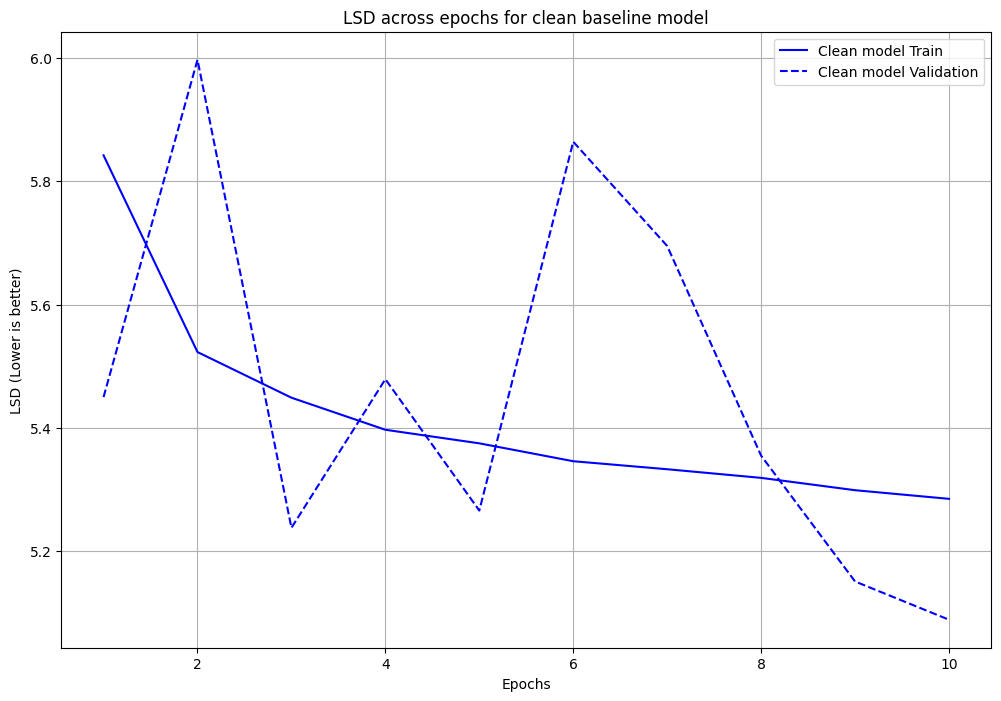

In [4]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
color = "blue"

# Plot each model's training and validation loss with a different color
clean_model_data = datasets["Clean model"]
plt.plot(epochs, clean_model_data["Train LSD"], label="Clean model Train", color=color)
plt.plot(epochs, clean_model_data["Validation LSD"], linestyle="--", label="Clean model Validation", color=color)
# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("LSD (Lower is better)")
plt.title("LSD across epochs for clean baseline model")
plt.legend()
plt.grid(True)

plt.savefig("plots/LSDBaselineModel.png", format="png")

# Show plot
plt.show()

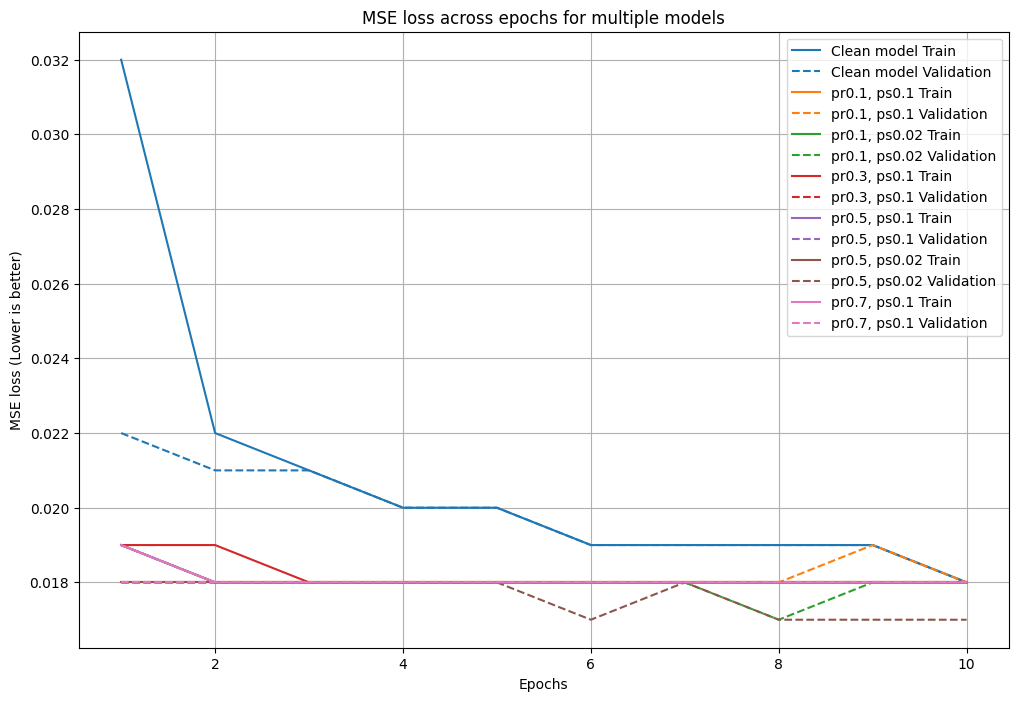

In [5]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
colors = plt.cm.tab10(range(len(datasets)))

# Plot each model's training and validation loss with a different color
for i, (model, data) in enumerate(datasets.items()):
    plt.plot(epochs, data["Train Loss"], label=f"{model} Train", color=colors[i])
    plt.plot(epochs, data["Validation Loss"], linestyle="--", label=f"{model} Validation", color=colors[i])

# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("MSE loss (Lower is better)")
plt.title("MSE loss across epochs for multiple models")
plt.legend()
plt.grid(True)

plt.savefig("plots/MSELBackdoorModels.png", format="png")

# Show plot
plt.show()

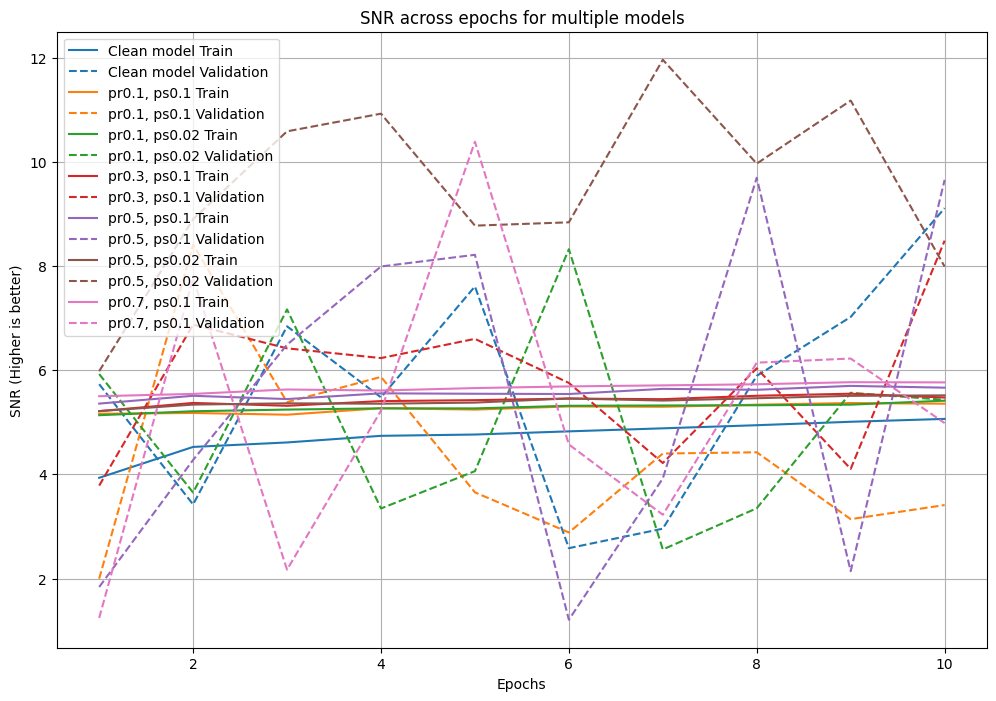

In [6]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
colors = plt.cm.tab10(range(len(datasets)))

# Plot each model's training and validation loss with a different color
for i, (model, data) in enumerate(datasets.items()):
    plt.plot(epochs, data["Train SNR"], label=f"{model} Train", color=colors[i])
    plt.plot(epochs, data["Validation SNR"], linestyle="--", label=f"{model} Validation", color=colors[i])

# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("SNR (Higher is better)")
plt.title("SNR across epochs for multiple models")
plt.legend()
plt.grid(True)

plt.savefig("plots/SNRBackdoorModels.png", format="png")

# Show plot
plt.show()

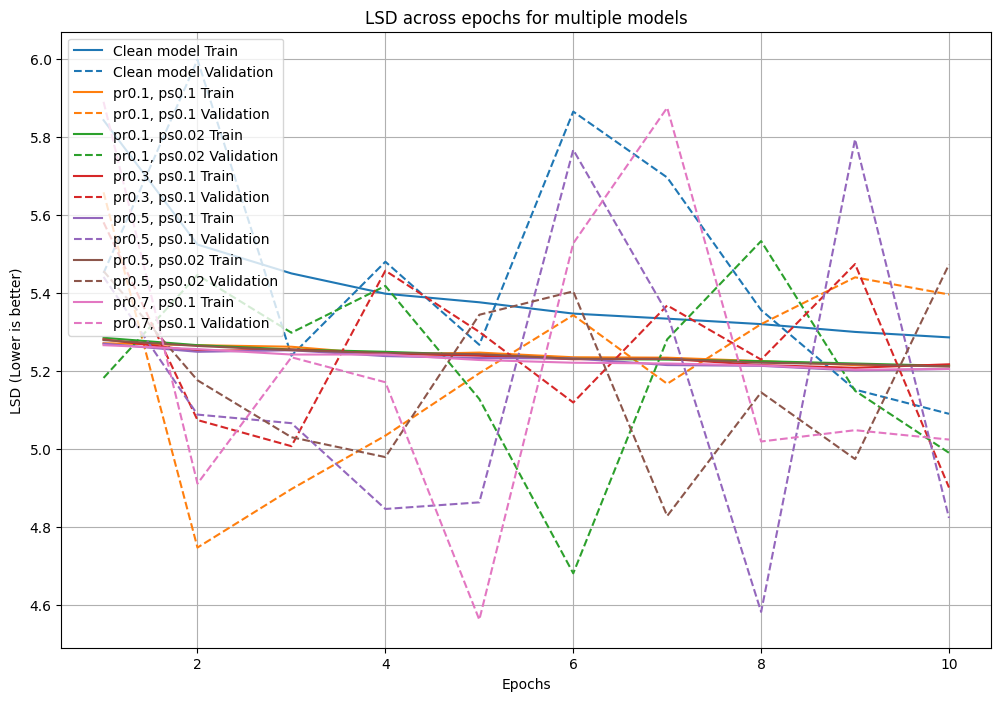

In [7]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
colors = plt.cm.tab10(range(len(datasets)))

# Plot each model's training and validation loss with a different color
for i, (model, data) in enumerate(datasets.items()):
    plt.plot(epochs, data["Train LSD"], label=f"{model} Train", color=colors[i])
    plt.plot(epochs, data["Validation LSD"], linestyle="--", label=f"{model} Validation", color=colors[i])

# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("LSD (Lower is better)")
plt.title("LSD across epochs for multiple models")
plt.legend(loc="upper left")
plt.grid(True)

plt.savefig("plots/LSDBackdoorModels.png", format="png")

# Show plot
plt.show()

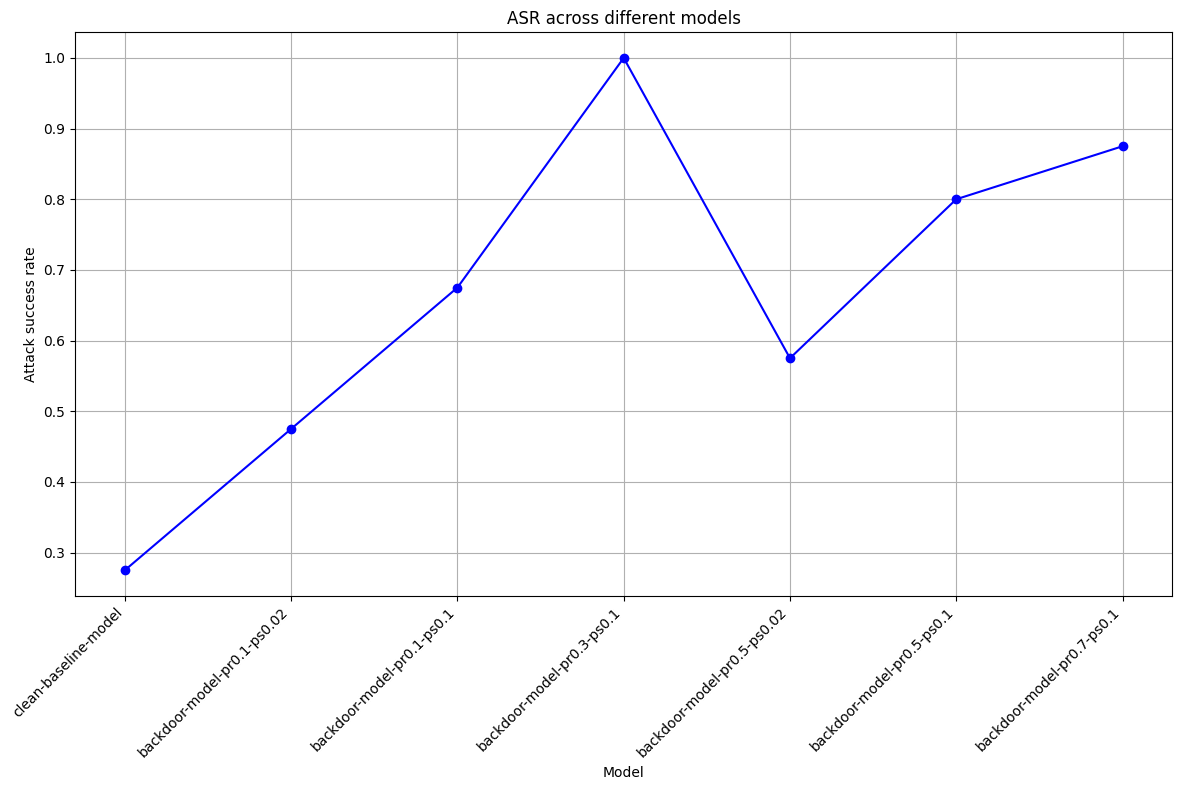

In [8]:
# Define data for models and their corresponding ASR values
models = [
    "clean-baseline-model",
    "backdoor-model-pr0.1-ps0.02",
    "backdoor-model-pr0.1-ps0.1",
    "backdoor-model-pr0.3-ps0.1",
    "backdoor-model-pr0.5-ps0.02",
    "backdoor-model-pr0.5-ps0.1",
    "backdoor-model-pr0.7-ps0.1"
]
asr_values = [0.275, 0.475, 0.675, 1.0, 0.575, 0.8, 0.875]

# Plotting ASR values for each model
plt.figure(figsize=(12, 8))
plt.plot(models, asr_values, marker='o', linestyle='-', color='b')

# Adding labels, title, and grid
plt.xlabel("Model")
plt.ylabel("Attack success rate")
plt.title("ASR across different models")
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability
plt.grid(True)

# Display plot
plt.tight_layout()
plt.savefig("plots/ASRBackdoorModels.png", format="png")

plt.show()


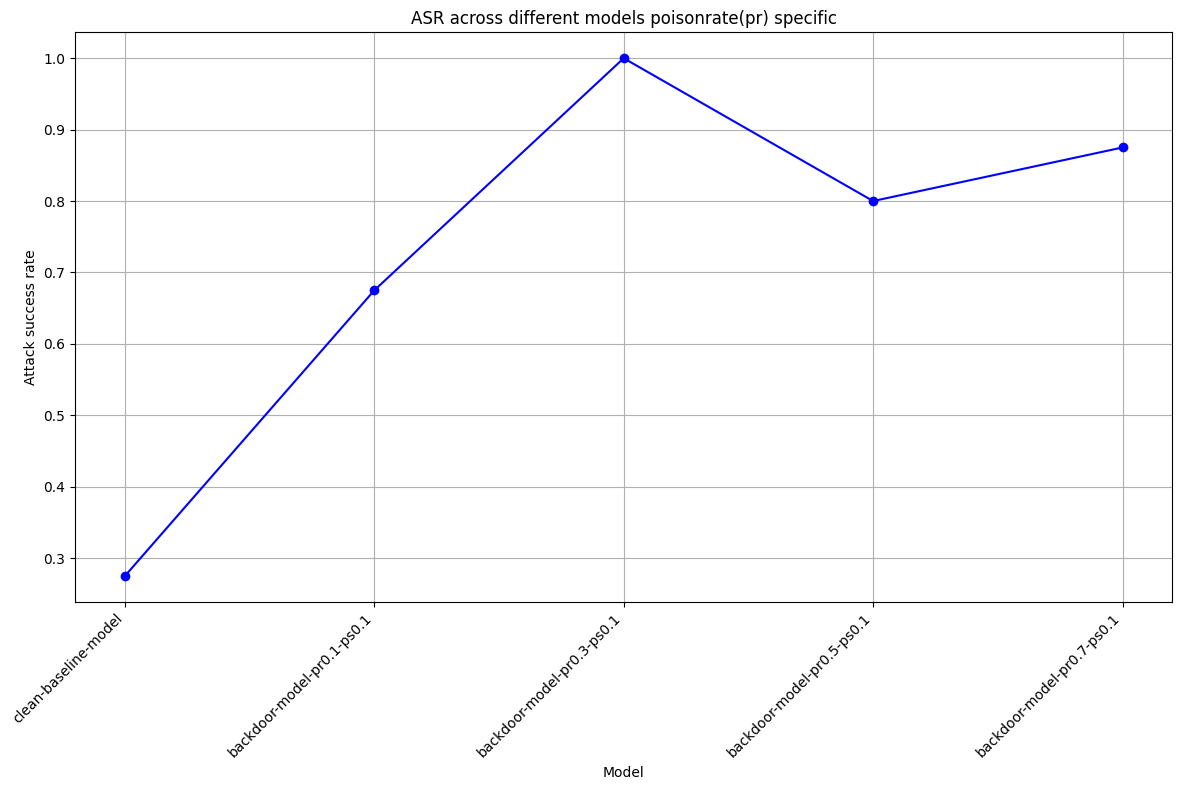

In [9]:
# Define data for models and their corresponding ASR values
models = [
    "clean-baseline-model",
    "backdoor-model-pr0.1-ps0.1",
    "backdoor-model-pr0.3-ps0.1",
    "backdoor-model-pr0.5-ps0.1",
    "backdoor-model-pr0.7-ps0.1"
]
asr_values = [0.275, 0.675, 1.0, 0.8, 0.875]

# Plotting ASR values for each model
plt.figure(figsize=(12, 8))
plt.plot(models, asr_values, marker='o', linestyle='-', color='b')

# Adding labels, title, and grid
plt.xlabel("Model")
plt.ylabel("Attack success rate")
plt.title("ASR across different models poisonrate(pr) specific")
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability
plt.grid(True)

# Display plot
plt.tight_layout()
plt.savefig("plots/ASRBackdoorModelsPr.png", format="png")

plt.show()

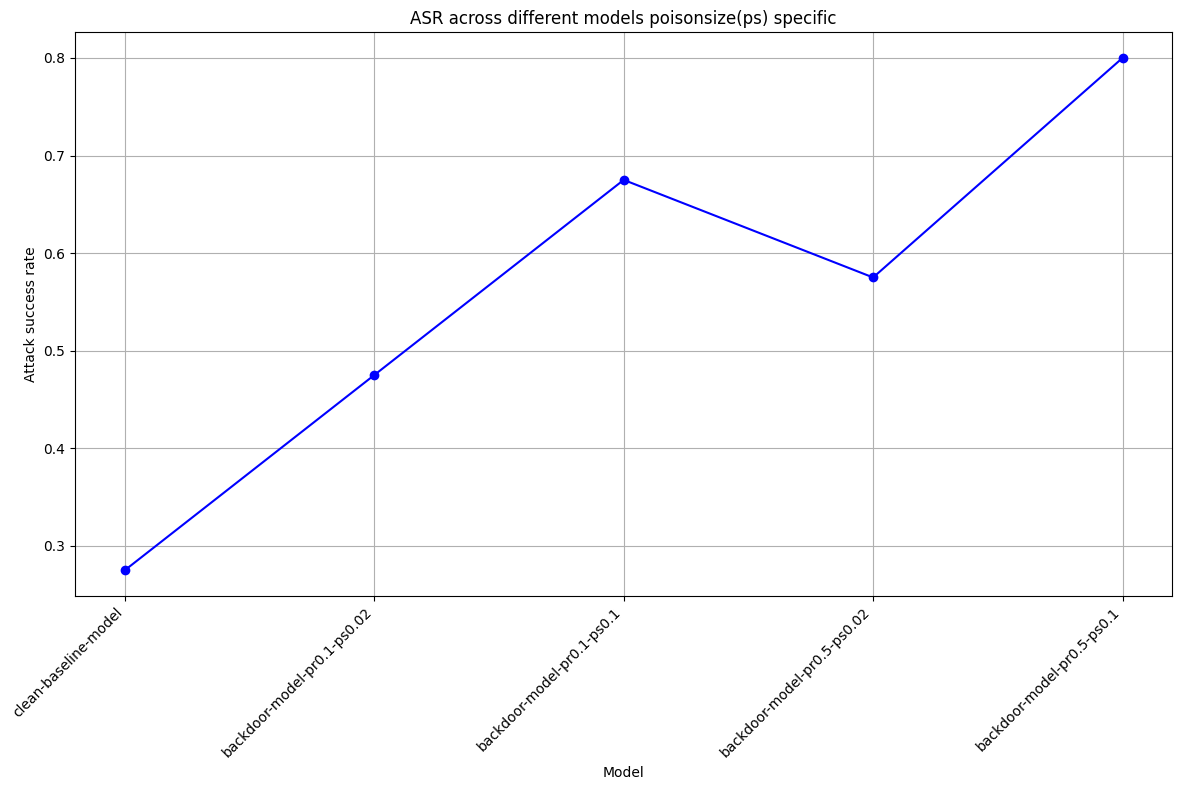

In [10]:
# Define data for models and their corresponding ASR values
models = [
    "clean-baseline-model",
    "backdoor-model-pr0.1-ps0.02",
    "backdoor-model-pr0.1-ps0.1",
    "backdoor-model-pr0.5-ps0.02",
    "backdoor-model-pr0.5-ps0.1",
]
asr_values = [0.275, 0.475, 0.675, 0.575, 0.8]

# Plotting ASR values for each model
plt.figure(figsize=(12, 8))
plt.plot(models, asr_values, marker='o', linestyle='-', color='b')

# Adding labels, title, and grid
plt.xlabel("Model")
plt.ylabel("Attack success rate")
plt.title("ASR across different models poisonsize(ps) specific")
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability
plt.grid(True)

# Display plot
plt.tight_layout()
plt.savefig("plots/ASRBackdoorModelsPs.png", format="png")

plt.show()

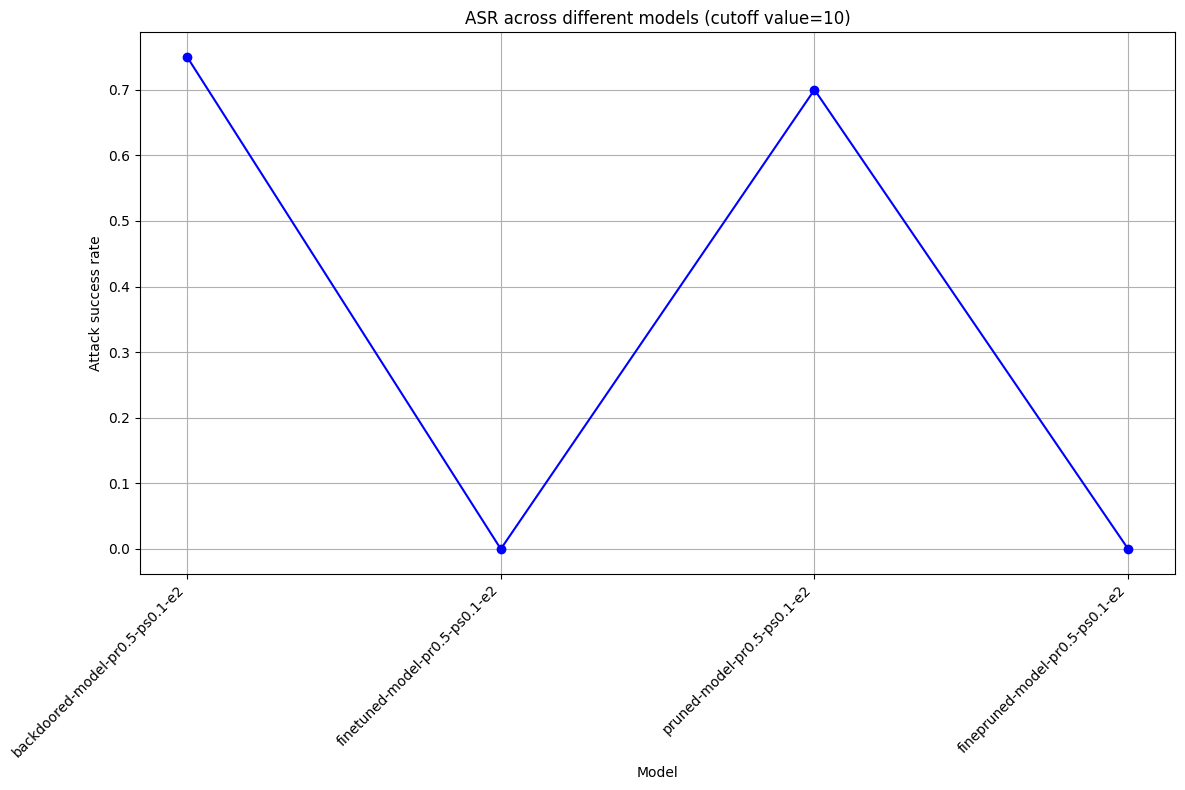

In [11]:
# Define data for models and their corresponding ASR values
models = [
    "backdoored-model-pr0.5-ps0.1-e2",
    "finetuned-model-pr0.5-ps0.1-e2",
    "pruned-model-pr0.5-ps0.1-e2",
    "finepruned-model-pr0.5-ps0.1-e2"
]
asr_values = [0.75, 0.0, 0.7, 0.0]

# Plotting ASR values for each model
plt.figure(figsize=(12, 8))
plt.plot(models, asr_values, marker='o', linestyle='-', color='b')

# Adding labels, title, and grid
plt.xlabel("Model")
plt.ylabel("Attack success rate")
plt.title("ASR across different models (cutoff value=10)")
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability
plt.grid(True)

# Display plot
plt.tight_layout()
plt.savefig("plots/ASRDefenseModels10.png", format="png")

plt.show()

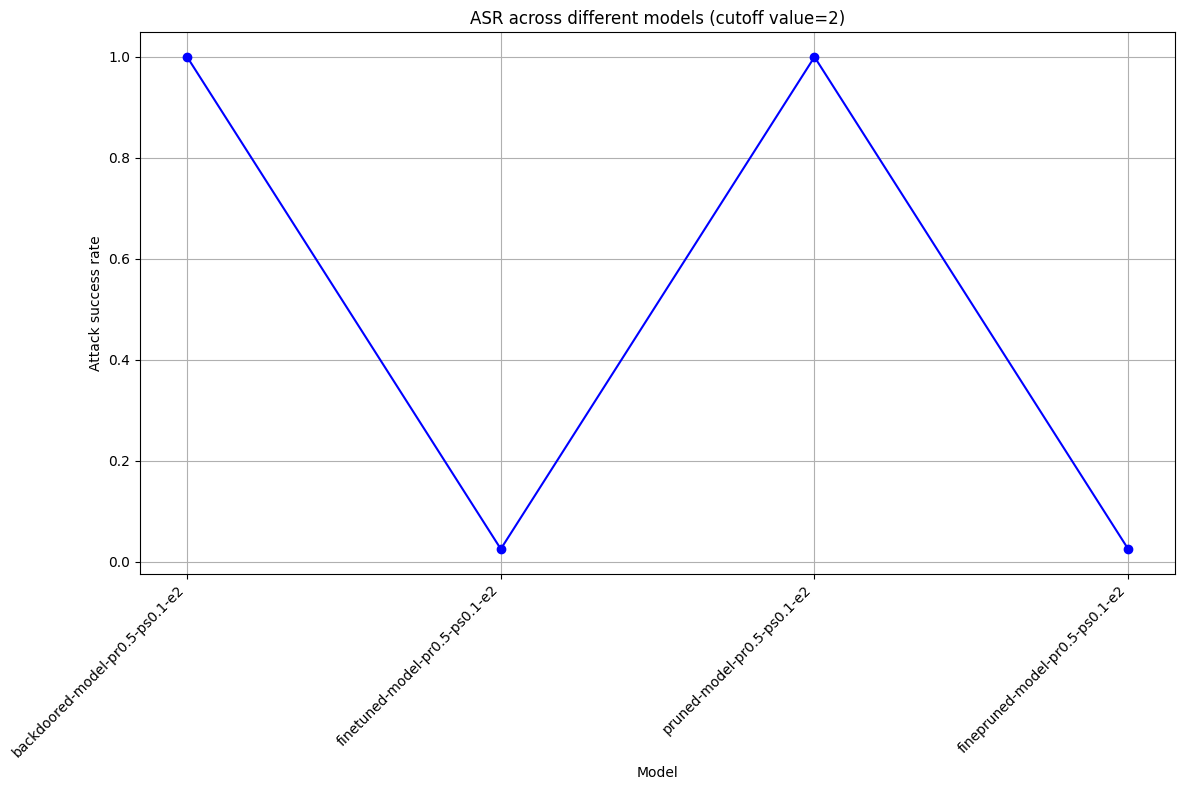

In [12]:
# Define data for models and their corresponding ASR values
models = [
    "backdoored-model-pr0.5-ps0.1-e2",
    "finetuned-model-pr0.5-ps0.1-e2",
    "pruned-model-pr0.5-ps0.1-e2",
    "finepruned-model-pr0.5-ps0.1-e2"
]
asr_values = [1.0, 0.025, 1.0, 0.025]

# Plotting ASR values for each model
plt.figure(figsize=(12, 8))
plt.plot(models, asr_values, marker='o', linestyle='-', color='b')

# Adding labels, title, and grid
plt.xlabel("Model")
plt.ylabel("Attack success rate")
plt.title("ASR across different models (cutoff value=2)")
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability
plt.grid(True)

# Display plot
plt.tight_layout()
plt.savefig("plots/ASRDefenseModels2.png", format="png")

plt.show()

In [13]:
datasets2 = {
    "Clean baseline model": {
        "Train Loss":       [0.032, 0.022, 0.021, 0.020, 0.020, 0.019, 0.019, 0.019, 0.019, 0.018],
        "Validation Loss":  [0.022, 0.021, 0.021, 0.020, 0.020, 0.019, 0.019, 0.019, 0.019, 0.018],
        "Train SNR":        [3.934, 4.527, 4.613, 4.740, 4.765, 4.826, 4.884, 4.944, 5.010, 5.065],
        "Validation SNR":   [5.732, 3.422, 6.843, 5.478, 7.608, 2.583, 2.957, 5.892, 7.023, 9.112],
        "Train LSD":        [5.842, 5.523, 5.449, 5.397, 5.375, 5.346, 5.333, 5.319, 5.299, 5.285],
        "Validation LSD":   [5.450, 5.997, 5.238, 5.479, 5.266, 5.864, 5.695, 5.355, 5.151, 5.089]
    },
    "Finetuning": {
        "Train Loss":       [0.018, 0.018],
        "Validation Loss":  [0.018, 0.018],
        "Train SNR":        [5.299, 5.274],
        "Validation SNR":   [6.526, 4.673],
        "Train LSD":        [5.217, 5.215],
        "Validation LSD":   [5.100, 5.353]
    },
    "Finepruning": {
        "Train Loss":       [0.018, 0.018],
        "Validation Loss":  [0.018, 0.018],
        "Train SNR":        [5.319, 5.348],
        "Validation SNR":   [5.622, 11.153],
        "Train LSD":        [5.211, 5.205],
        "Validation LSD":   [5.405, 4.605]
    }
}

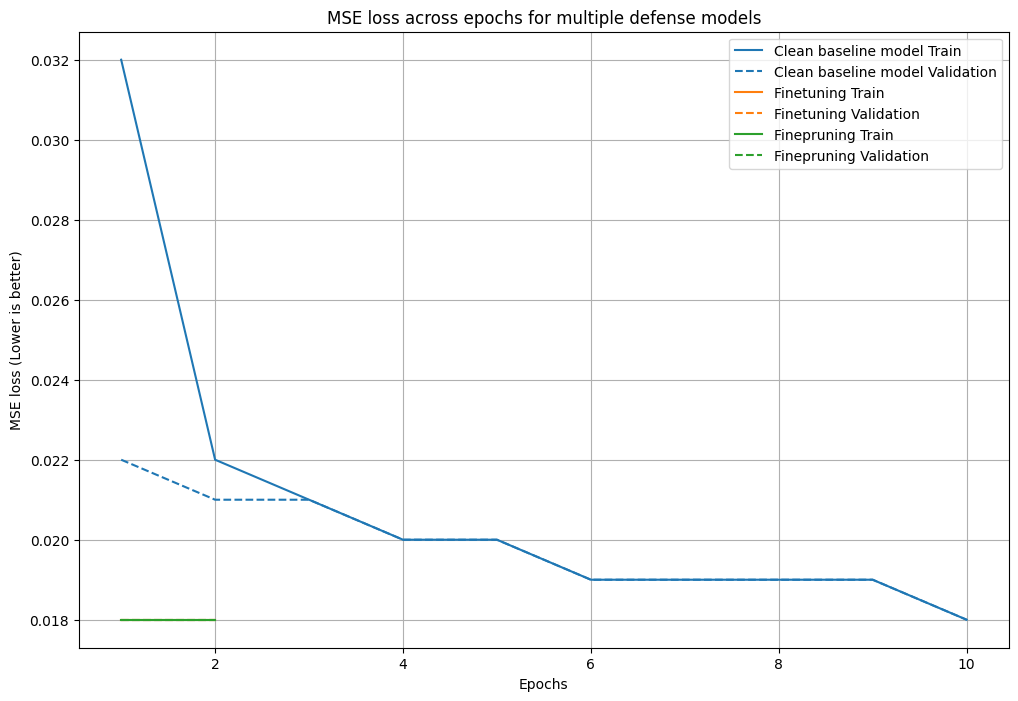

In [14]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
colors = plt.cm.tab10(range(len(datasets2)))

# Plot each model's training and validation loss with a different color
for i, (model, data) in enumerate(datasets2.items()):
    epochs = list(range(1, len(data["Train Loss"]) + 1))
    plt.plot(epochs, data["Train Loss"], label=f"{model} Train", color=colors[i])
    plt.plot(epochs, data["Validation Loss"], linestyle="--", label=f"{model} Validation", color=colors[i])

# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("MSE loss (Lower is better)")
plt.title("MSE loss across epochs for multiple defense models")
plt.legend()
plt.grid(True)

plt.savefig("plots/MSELDefenseModels.png", format="png")

# Show plot
plt.show()

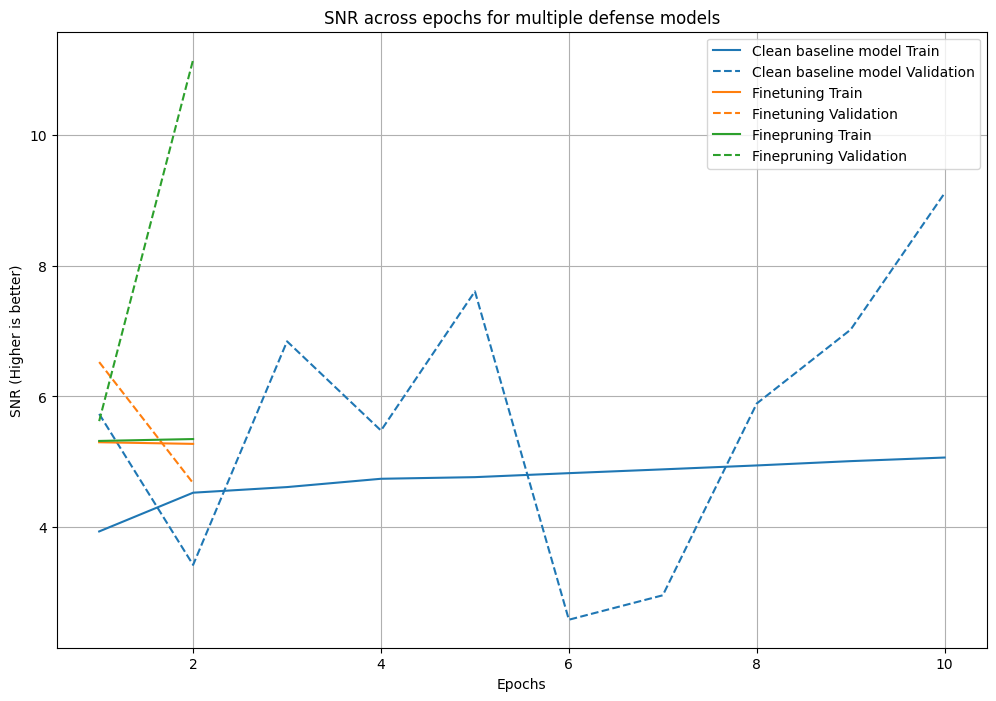

In [15]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
colors = plt.cm.tab10(range(len(datasets2)))

# Plot each model's training and validation loss with a different color
for i, (model, data) in enumerate(datasets2.items()):
    epochs = list(range(1, len(data["Train SNR"]) + 1))
    plt.plot(epochs, data["Train SNR"], label=f"{model} Train", color=colors[i])
    plt.plot(epochs, data["Validation SNR"], linestyle="--", label=f"{model} Validation", color=colors[i])

# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("SNR (Higher is better)")
plt.title("SNR across epochs for multiple defense models")
plt.legend()
plt.grid(True)

plt.savefig("plots/SNRDefenseModels.png", format="png")

# Show plot
plt.show()

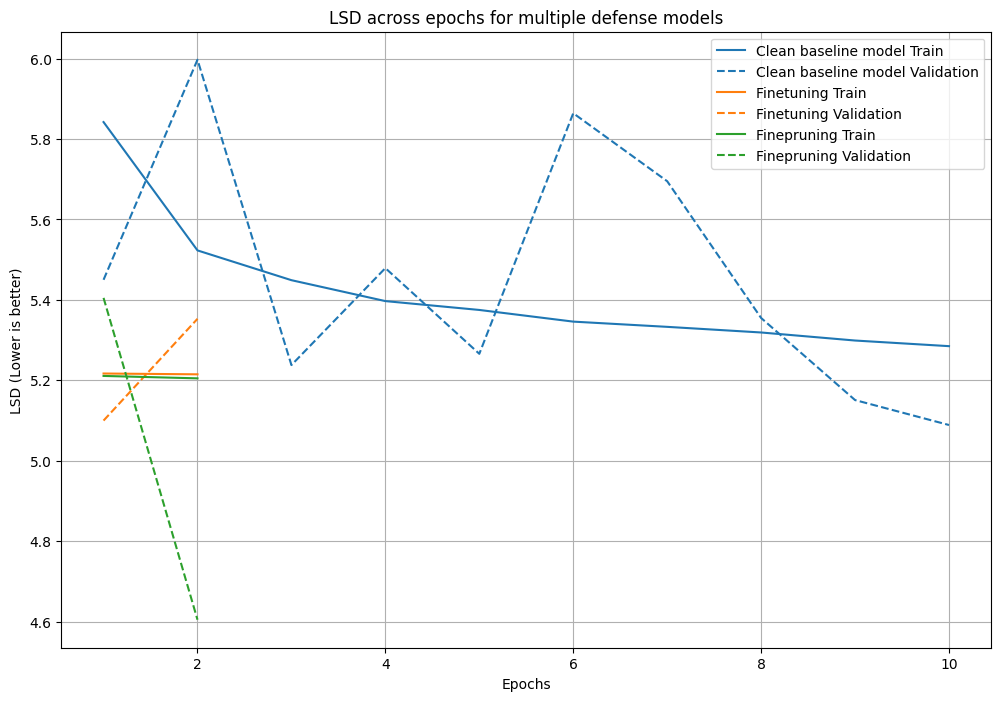

In [16]:
plt.figure(figsize=(12, 8))

# Generate a unique color for each model
colors = plt.cm.tab10(range(len(datasets2)))

# Plot each model's training and validation loss with a different color
for i, (model, data) in enumerate(datasets2.items()):
    epochs = list(range(1, len(data["Train LSD"]) + 1))
    plt.plot(epochs, data["Train LSD"], label=f"{model} Train", color=colors[i])
    plt.plot(epochs, data["Validation LSD"], linestyle="--", label=f"{model} Validation", color=colors[i])

# Adding labels, title, and legend
plt.xlabel("Epochs")
plt.ylabel("LSD (Lower is better)")
plt.title("LSD across epochs for multiple defense models")
plt.legend()
plt.grid(True)

plt.savefig("plots/LSDDefenseModels.png", format="png")

# Show plot
plt.show()